* Whitaker Behrens
* BrainStation Data Science
* Capstone

# Pneumonia Image Classification with Neural Networks

In [53]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random

# import tensorflow libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

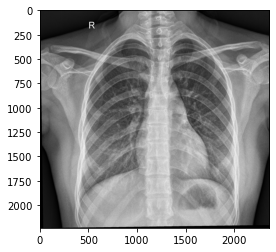

In [54]:
# import images

data_dir = 'data'
categories = ['negative', 'positive']

for category in categories:
    
    path = os.path.join(data_dir, category)
    
    for img in os.listdir(path):
        
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [55]:
# check array

print(img_array.shape)

(2234, 2359)


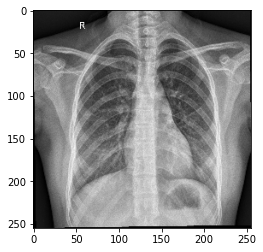

In [56]:
# resize images

img_size=255

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [60]:
# import images with labels

labeled_data = []

def create_labeled_data():
    
    for category in categories:
    
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                labeled_data.append([new_array, class_num])
            except Exception:
                pass
            
create_labeled_data()

In [61]:
# check imported images

print(len(labeled_data))

5856


In [62]:
# shuffle the images

import random

random.shuffle(labeled_data)

In [63]:
# check labels

for image in labeled_data[:10]:
    print(image[1])

1
1
1
1
1
0
0
1
1
1


In [64]:
# create X and y variables

X = []
y = []

for image, label in labeled_data:
    X.append(image)
    y.append(label)

# convert to array
    
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

In [65]:
# check

print(X.shape)
print(y.shape)

(5856, 255, 255, 1)
(5856,)


In [66]:
# scale X

X = X/255.0

In [67]:
# instantiate model

model = Sequential()

# add layers

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

# output layer

model.add(Dense(1))
model.add(Activation('sigmoid'))

# compile model

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# fit

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.2)

Epoch 1/3
115/147 [======================>.......] - ETA: 55s - loss: 2.4910 - accuracy: 0.7657

KeyboardInterrupt: 